In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from math import e
j = cmath.sqrt(-1)

In [2]:
#operator definitionis
N=2
si = qeye(2)
sx = 0.5*sigmax()
sy = 0.5*sigmay()
sz = 0.5*sigmaz()

In [3]:
#make list of tensor products
sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sy
    sy_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

In [11]:
#construct Hamiltonian
B = 1
A0 = 1
H = B*sz_list[0] 
for n in range(N-1):
    H += A0*sz_list[0]*sz_list[n+1] + A0*sx_list[0]*sx_list[n+1] + A0*sy_list[0]*sy_list[n+1]
print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.75  0.    0.    0.  ]
 [ 0.    0.25  0.5   0.  ]
 [ 0.    0.5  -0.75  0.  ]
 [ 0.    0.    0.   -0.25]]


In [12]:
#Find eigenvalues and eigenvectors
ebasis = H.eigenstates()[1]
eng = H.eigenstates()[0]

In [13]:
#Create initial state
#Define spin up as 0 and spin down as 1, with the index the position of the particle
spin = np.full(N,0)
spin[1] = 1
index = 0
for i in range(N):
    index += 2**(i)*spin[N-1-i]
allup = basis(2**N,0)
#Create state in tensor product basis
psi0 = basis(2**N,index)
psi0

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [14]:
#Evolution
steps = 500
times = np.linspace(0,20)
result = sesolve(H, psi0, times, [sz_list[0]])

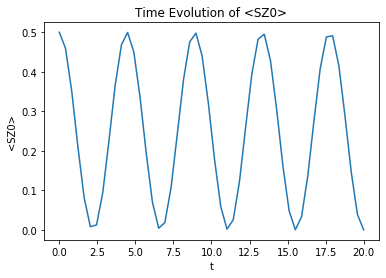

In [15]:
plt.plot(times, result.expect[0])
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<SZ0>")
plt.xlabel("t")
plt.show()

In [16]:
#ground state determination
groundState= H.groundstate()
groundState

(-0.9571067811865476,
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [-0.38268343]
  [ 0.92387953]
  [ 0.        ]])